In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CA4-glassTrain.csv')

In [3]:
df.head()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,4,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1


In [4]:
# Search for missing values
missing = np.asarray(df.isnull().sum())
if missing.any():
    print("Dataset has missing values")
else:
    print('No missing values!')

No missing values!


In [5]:
# Number of features to be plotted

num_vars = 9

# Create frame with features and types
glass_df = df.iloc[:, 1:num_vars+2]
# assign types to variable y
y = df.iloc[:, 10]

In [45]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
4,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
138,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
139,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
140,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
141,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [6]:
list(glass_df.columns)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type']

In [7]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.518283,13.407343,2.686014,1.438112,72.669720,0.541469,8.892867,0.185594,0.058182,2.769231
std,0.002838,0.860110,1.440136,0.526674,0.817668,0.765075,1.328536,0.535022,0.100853,2.098599
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.790000,0.000000,0.000000,1.000000
25%,1.516550,12.915000,1.855000,1.180000,72.280000,0.140000,8.225000,0.000000,0.000000,1.000000
50%,1.517680,13.270000,3.480000,1.340000,72.810000,0.560000,8.650000,0.000000,0.000000,2.000000
75%,1.519100,13.875000,3.610000,1.620000,73.100000,0.610000,9.105000,0.000000,0.095000,3.000000
max,1.531250,17.380000,4.490000,3.500000,75.410000,6.210000,14.960000,3.150000,0.510000,7.000000


Comment: RI have extremely low standard deviation. With minimum ad maximum values very close  

Comment2: K have a high max relative to min-25-50-75. More than seven standard deviations greater than the mean.  
A possible reason is that it has a lot of zero values.  

Comment3: Ba also seems to have a lot of zero values min-25-50-75 all zero.

Comment4: Fe too

Some glass types seems to not consist of mg, K, Ca, ba and Fe

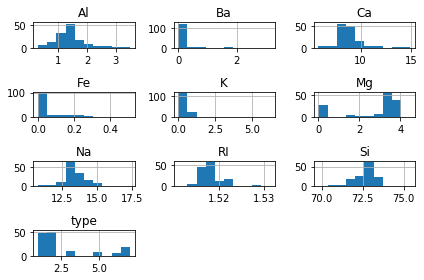

In [8]:
# Histograms

glass_df.hist()
plt.tight_layout()
plt.show()

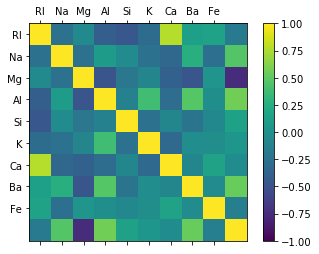

In [9]:
# Plot correlation matrix

correlations = glass_df.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, num_vars, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(glass_df.columns))
ax.set_yticklabels(list(glass_df.columns))
plt.show()

In [10]:
correlations

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
RI,1.000000,-0.253868,-0.054192,-0.397737,-0.460722,-0.290820,0.780560,0.126707,0.152833,-0.165806
Na,-0.253868,1.000000,-0.242360,0.093867,-0.036559,-0.248443,-0.331006,0.251301,-0.270357,0.461046
Mg,-0.054192,-0.242360,1.000000,-0.469090,-0.204336,-0.092869,-0.381698,-0.467407,0.046303,-0.742754
Al,-0.397737,0.093867,-0.469090,1.000000,-0.120880,0.387464,-0.282496,0.469949,-0.003088,0.565581
Si,-0.460722,-0.036559,-0.204336,-0.120880,1.000000,-0.252755,-0.082884,-0.228678,-0.069682,0.146187
K,-0.290820,-0.248443,-0.092869,0.387464,-0.252755,1.000000,-0.315633,-0.018852,-0.013938,0.047275
Ca,0.780560,-0.331006,-0.381698,-0.282496,-0.082884,-0.315633,1.000000,-0.078843,0.155016,-0.028556
Ba,0.126707,0.251301,-0.467407,0.469949,-0.228678,-0.018852,-0.078843,1.000000,-0.036993,0.532214
Fe,0.152833,-0.270357,0.046303,-0.003088,-0.069682,-0.013938,0.155016,-0.036993,1.000000,-0.140413
type,-0.165806,0.461046,-0.742754,0.565581,0.146187,0.047275,-0.028556,0.532214,-0.140413,1.000000


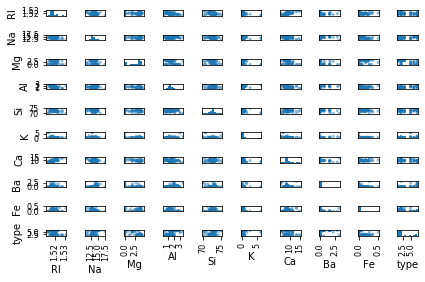

In [11]:
# Scatter plot matrix pandas


pd.plotting.scatter_matrix(glass_df)
plt.tight_layout()
plt.show()

In [12]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
4,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1


In [13]:
# Plotting for some features. Make new df
glass_df2 = glass_df.iloc[:, [0, 4, 6, 9]]

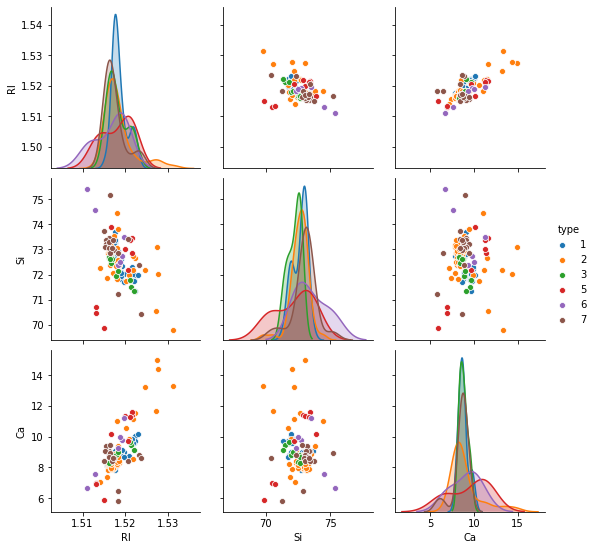

In [14]:
# Pairplot with seaborn
sns.pairplot(glass_df2, hue='type')
plt.show()

Seems logical that some glass types does not consist of all chemical components
Try to visualize an example. Extract only type 1 data.

In [41]:
glass_type = glass_df.groupby(df['type'])
glass_type[['Ba', 'Fe']].describe()

Ba                                                     Fe            \
     count      mean       std  min   25%   50%   75%   max count      mean   
type                                                                          
1     47.0  0.017021  0.101573  0.0  0.00  0.00  0.00  0.69  47.0  0.044043   
2     51.0  0.069608  0.440881  0.0  0.00  0.00  0.00  3.15  51.0  0.088235   
3     11.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00  11.0  0.066364   
5      9.0  0.271111  0.727675  0.0  0.00  0.00  0.00  2.20   9.0  0.087778   
6      6.0  0.000000  0.000000  0.0  0.00  0.00  0.00  0.00   6.0  0.000000   
7     19.0  1.039474  0.733776  0.0  0.55  0.76  1.61  2.88  19.0  0.012105   

                                            
           std  min  25%  50%    75%   max  
type                                        
1     0.075200  0.0  0.0  0.0  0.070  0.24  
2     0.113185  0.0  0.0  0.0  0.175  0.35  
3     0.116385  0.0  0.0  0.0  0.095  0.37  
5     0.183424  0.0  0.0  0.0  0.000  0.51  
6     0.000000  0.0  0.0  0.0  0.000  0.00  
7     0.028201  0.0  0.0  0.0  0.000  0.09

In [42]:
# Visualize Ba, mg in type 2

In [54]:
glass_df[['Mg', 'Ba', 'type']]

,Mg,Ba,type
0,4.49,0.00,1
1,3.60,0.00,1
2,3.69,0.00,1
3,3.62,0.00,1
4,3.60,0.00,1
...,...,...,...
138,0.00,2.88,7
139,0.00,0.54,7
140,0.00,1.59,7
141,0.00,1.64,7
